#OBJETIVO

Criar um algoritmo de Machine Learning capaz de auxiliar na análise de risco
de incêndios florestais.


# Carregamento e limpeza dos dados

In [ ]:
#Caso esteja rodando em Google Colab será necessario rodar essa celula antes, se não pode ignorar e ir para a proxima
!pip install --upgrade matplotlib scipy plotnine tsfresh
!pip install --upgrade sktime pycaret
!pip show numpy
!pip install "numpy>=2.0.0,<3.0.0"
!pip install mizani

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

## Installs

In [ ]:
!pip install numba -q
!pip install pycaret -q

## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos dados e Limpeza do datset

In [ ]:
df = pd.read_csv('/content/Risco_Fogo.csv', sep=';', encoding='utf-8')
df

,data_hora_gmt,municipio,estado,numero_dias_sem_chuva,risco_fogo,bioma
0,01/01/2025 00:35,AQUIDAUANA,MATO GROSSO DO SUL,7.0,0.74,Pantanal
1,01/01/2025 00:35,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.15,Cerrado
2,01/01/2025 00:35,AQUIDAUANA,MATO GROSSO DO SUL,7.0,0.47,Pantanal
3,01/01/2025 00:35,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.15,Cerrado
4,01/01/2025 00:38,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.14,Cerrado
...,...,...,...,...,...,...
164804,30/04/2025 22:40,OEIRAS,PIAUÍ,5.0,0.81,Caatinga
164805,30/04/2025 22:50,SANTA MARIA DAS BARREIRAS,PARÁ,2.0,0.33,Amazônia
164806,30/04/2025 22:50,OEIRAS,PIAUÍ,5.0,0.81,Caatinga
164807,30/04/2025 23:10,OEIRAS,PIAUÍ,5.0,0.81,Caatinga


### Análise de dados nulo

In [ ]:
df.isna().sum()

,0
data_hora_gmt,0
municipio,0
estado,0
numero_dias_sem_chuva,0
risco_fogo,0
bioma,0


### Análise da existencia de dados duplicados

In [ ]:
df.duplicated().sum()

44293

In [ ]:
df = df.drop_duplicates()

### Dividindo a coluna data_hora_gmt em Data e Horario

In [ ]:
df['data_hora_gmt'] = pd.to_datetime(df['data_hora_gmt'], format='%d/%m/%Y %H:%M')
df['data'] = df['data_hora_gmt'].dt.date
df['horario'] = df['data_hora_gmt'].dt.strftime('%H:%M')
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M').dt.hour
df

,data_hora_gmt,municipio,estado,numero_dias_sem_chuva,risco_fogo,bioma,data,horario
0,2025-01-01 00:35:00,AQUIDAUANA,MATO GROSSO DO SUL,7.0,0.74,Pantanal,2025-01-01,0
1,2025-01-01 00:35:00,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.15,Cerrado,2025-01-01,0
2,2025-01-01 00:35:00,AQUIDAUANA,MATO GROSSO DO SUL,7.0,0.47,Pantanal,2025-01-01,0
4,2025-01-01 00:38:00,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.14,Cerrado,2025-01-01,0
5,2025-01-01 00:38:00,VILA BELA DA SANTÍSSIMA TRINDADE,MATO GROSSO,4.0,0.65,Amazônia,2025-01-01,0
...,...,...,...,...,...,...,...,...
164804,2025-04-30 22:40:00,OEIRAS,PIAUÍ,5.0,0.81,Caatinga,2025-04-30,22
164805,2025-04-30 22:50:00,SANTA MARIA DAS BARREIRAS,PARÁ,2.0,0.33,Amazônia,2025-04-30,22
164806,2025-04-30 22:50:00,OEIRAS,PIAUÍ,5.0,0.81,Caatinga,2025-04-30,22
164807,2025-04-30 23:10:00,OEIRAS,PIAUÍ,5.0,0.81,Caatinga,2025-04-30,23


Dropando a coluna data_hora_gmt

In [ ]:
df = df.drop('data_hora_gmt', axis=1)
df

,municipio,estado,numero_dias_sem_chuva,risco_fogo,bioma,data,horario
0,AQUIDAUANA,MATO GROSSO DO SUL,7.0,0.74,Pantanal,2025-01-01,0
1,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.15,Cerrado,2025-01-01,0
2,AQUIDAUANA,MATO GROSSO DO SUL,7.0,0.47,Pantanal,2025-01-01,0
4,FIGUEIRÓPOLIS,TOCANTINS,1.0,0.14,Cerrado,2025-01-01,0
5,VILA BELA DA SANTÍSSIMA TRINDADE,MATO GROSSO,4.0,0.65,Amazônia,2025-01-01,0
...,...,...,...,...,...,...,...
164804,OEIRAS,PIAUÍ,5.0,0.81,Caatinga,2025-04-30,22
164805,SANTA MARIA DAS BARREIRAS,PARÁ,2.0,0.33,Amazônia,2025-04-30,22
164806,OEIRAS,PIAUÍ,5.0,0.81,Caatinga,2025-04-30,22
164807,OEIRAS,PIAUÍ,5.0,0.81,Caatinga,2025-04-30,23


## Feature Engineering

### Binning da coluna **risco_fogo**

**O que é Binning?** é uma forma de agrupar dados contínuos em um número menor de categorias (as "caixinhas"), facilitando a visualização e a análise.

Como o nosso objetivo é criar um modelo capaz de auxiliar na análise de risco de incêndios florestais, fazer o Binning da nossa target irá auxiliar os analistas a identificarem se o evento possui um baixo ou alto risco de fogo.

In [ ]:
# Definindo os limites dos bins e os rótulos
bins = [0, 0.3, 0.6, 0.8, 1.0]
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

#Binning
df['risco_fogo_binned'] = pd.cut(df['risco_fogo'],
                                 bins=bins,
                                 labels=labels,
                                 include_lowest=True,
                                 right=True)
#Dropando a Feture Risco_Fogo
df = df.drop('risco_fogo', axis=1)
df

,municipio,estado,numero_dias_sem_chuva,bioma,data,horario,risco_fogo_binned
0,AQUIDAUANA,MATO GROSSO DO SUL,7.0,Pantanal,2025-01-01,0,Alto
1,FIGUEIRÓPOLIS,TOCANTINS,1.0,Cerrado,2025-01-01,0,Baixo
2,AQUIDAUANA,MATO GROSSO DO SUL,7.0,Pantanal,2025-01-01,0,Médio
4,FIGUEIRÓPOLIS,TOCANTINS,1.0,Cerrado,2025-01-01,0,Baixo
5,VILA BELA DA SANTÍSSIMA TRINDADE,MATO GROSSO,4.0,Amazônia,2025-01-01,0,Alto
...,...,...,...,...,...,...,...
164804,OEIRAS,PIAUÍ,5.0,Caatinga,2025-04-30,22,Muito Alto
164805,SANTA MARIA DAS BARREIRAS,PARÁ,2.0,Amazônia,2025-04-30,22,Médio
164806,OEIRAS,PIAUÍ,5.0,Caatinga,2025-04-30,22,Muito Alto
164807,OEIRAS,PIAUÍ,5.0,Caatinga,2025-04-30,23,Muito Alto


### Transformando a coluna Data em Dia de Semana

In [ ]:
print("Menor valor da coluna 'data':", df['data'].min())
print("Maior valor da coluna 'data':", df['data'].max())

Menor valor da coluna 'data': 2025-01-01
Maior valor da coluna 'data': 2025-04-30


Por conta de termos somente dados de Janeiro a Abril, optamos por fazer essa separação por dia de semana

In [ ]:
df['dia_de_semana'] = pd.to_datetime(df['data']).dt.day_name()
df

,municipio,estado,numero_dias_sem_chuva,bioma,data,horario,risco_fogo_binned,dia_de_semana
0,AQUIDAUANA,MATO GROSSO DO SUL,7.0,Pantanal,2025-01-01,0,Alto,Wednesday
1,FIGUEIRÓPOLIS,TOCANTINS,1.0,Cerrado,2025-01-01,0,Baixo,Wednesday
2,AQUIDAUANA,MATO GROSSO DO SUL,7.0,Pantanal,2025-01-01,0,Médio,Wednesday
4,FIGUEIRÓPOLIS,TOCANTINS,1.0,Cerrado,2025-01-01,0,Baixo,Wednesday
5,VILA BELA DA SANTÍSSIMA TRINDADE,MATO GROSSO,4.0,Amazônia,2025-01-01,0,Alto,Wednesday
...,...,...,...,...,...,...,...,...
164804,OEIRAS,PIAUÍ,5.0,Caatinga,2025-04-30,22,Muito Alto,Wednesday
164805,SANTA MARIA DAS BARREIRAS,PARÁ,2.0,Amazônia,2025-04-30,22,Médio,Wednesday
164806,OEIRAS,PIAUÍ,5.0,Caatinga,2025-04-30,22,Muito Alto,Wednesday
164807,OEIRAS,PIAUÍ,5.0,Caatinga,2025-04-30,23,Muito Alto,Wednesday


In [ ]:
dia_semana_portugues = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df['dia_de_semana'] = df['dia_de_semana'].map(dia_semana_portugues)
df = df.drop('data', axis=1)
df

,municipio,estado,numero_dias_sem_chuva,bioma,horario,risco_fogo_binned,dia_de_semana
0,AQUIDAUANA,MATO GROSSO DO SUL,7.0,Pantanal,0,Alto,Quarta-feira
1,FIGUEIRÓPOLIS,TOCANTINS,1.0,Cerrado,0,Baixo,Quarta-feira
2,AQUIDAUANA,MATO GROSSO DO SUL,7.0,Pantanal,0,Médio,Quarta-feira
4,FIGUEIRÓPOLIS,TOCANTINS,1.0,Cerrado,0,Baixo,Quarta-feira
5,VILA BELA DA SANTÍSSIMA TRINDADE,MATO GROSSO,4.0,Amazônia,0,Alto,Quarta-feira
...,...,...,...,...,...,...,...
164804,OEIRAS,PIAUÍ,5.0,Caatinga,22,Muito Alto,Quarta-feira
164805,SANTA MARIA DAS BARREIRAS,PARÁ,2.0,Amazônia,22,Médio,Quarta-feira
164806,OEIRAS,PIAUÍ,5.0,Caatinga,22,Muito Alto,Quarta-feira
164807,OEIRAS,PIAUÍ,5.0,Caatinga,23,Muito Alto,Quarta-feira


## Análise Exploratória dos Dados (EDA)


### Visualização da distribuição da nossa target

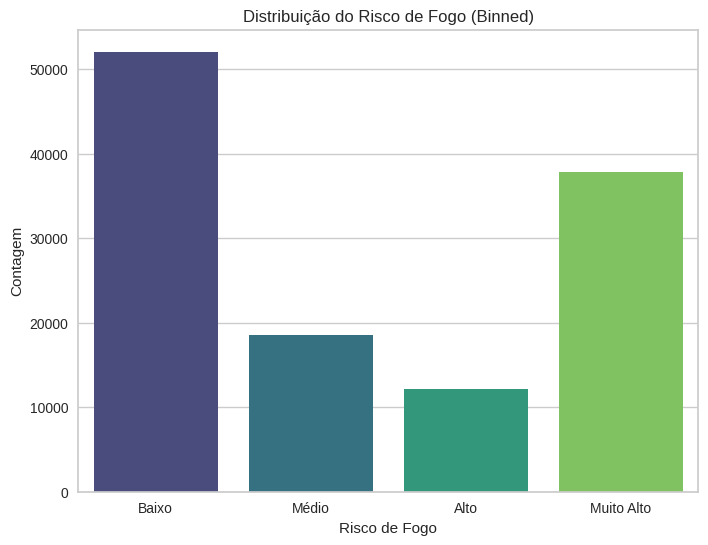

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='risco_fogo_binned', data=df, palette='viridis')
plt.title('Distribuição do Risco de Fogo (Binned)')
plt.xlabel('Risco de Fogo')
plt.ylabel('Contagem')
plt.show()

### Visualização das distribuições das variáveis numéricas

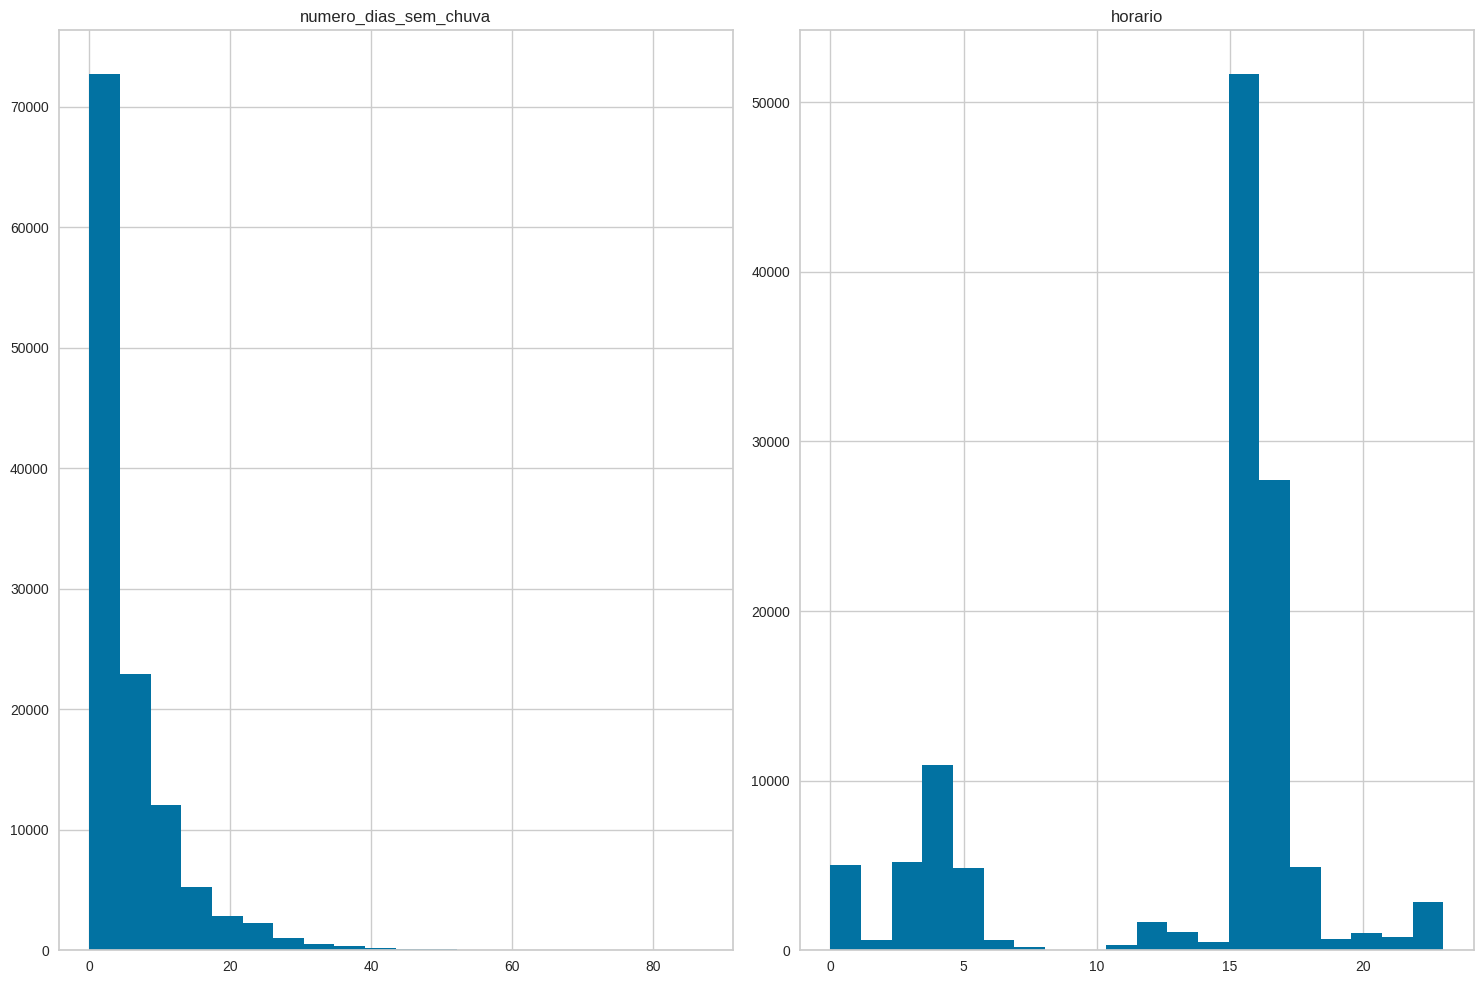

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

### Análise de correlação entre as variáveis numéricas

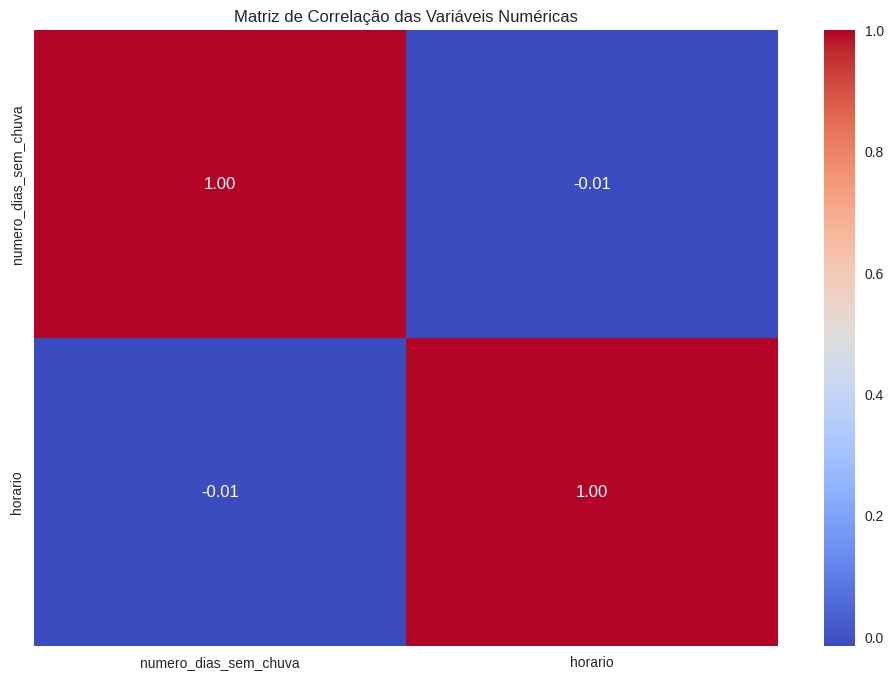

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

### Análise da relação entre variáveis categóricas e a variável target binned

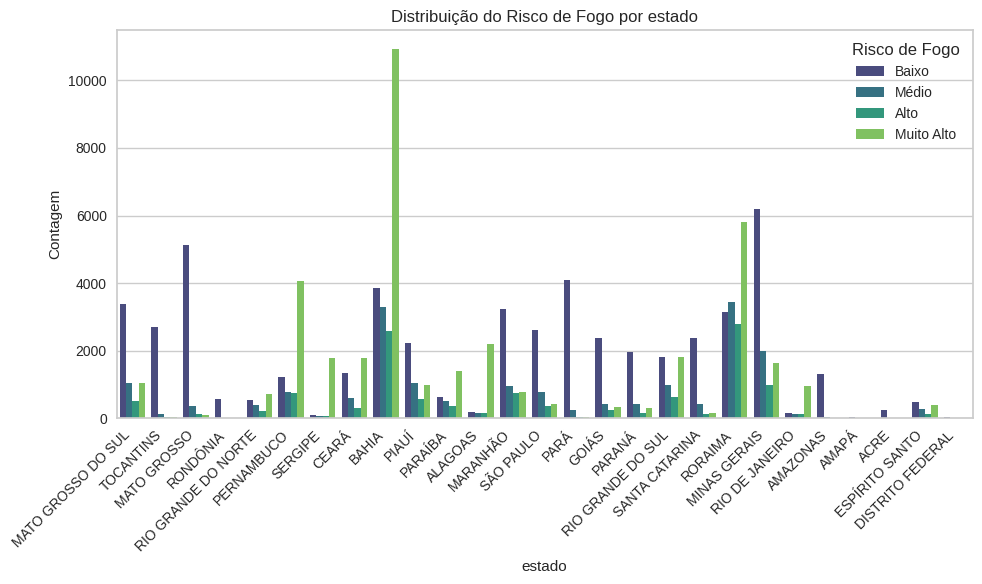

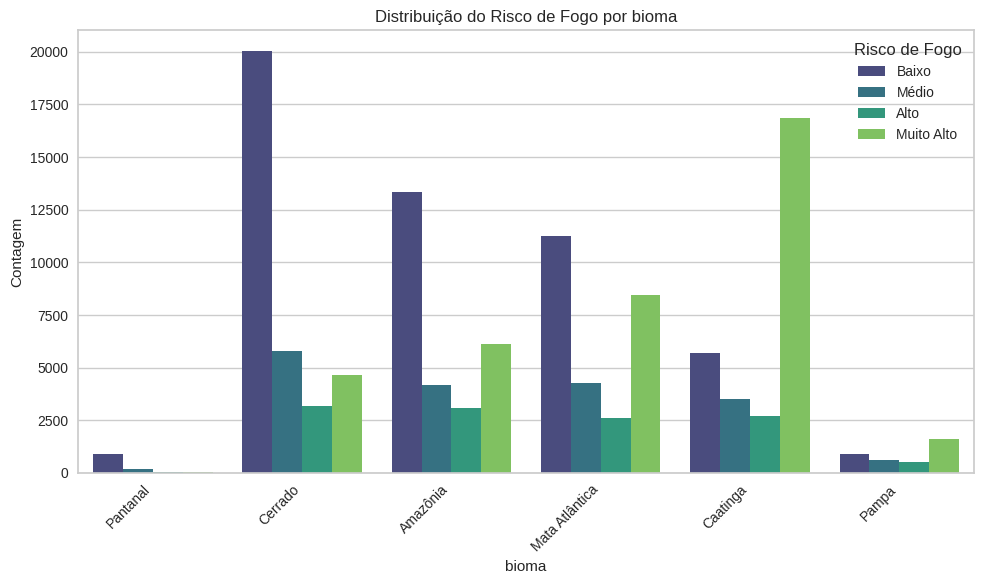

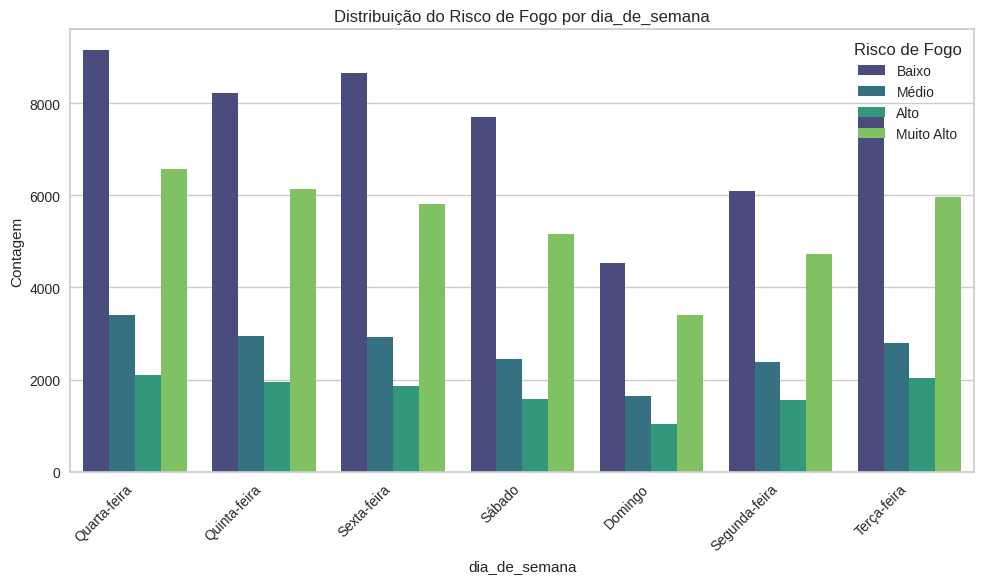

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    if col != 'risco_fogo_binned' and col != 'municipio': # Adiciona a condição para pular 'municipio'
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='risco_fogo_binned', data=df, palette='viridis')
        plt.title(f'Distribuição do Risco de Fogo por {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Risco de Fogo')
        plt.tight_layout()
        plt.show()

### Análise da relação entre variáveis numéricas e a target usando boxplots

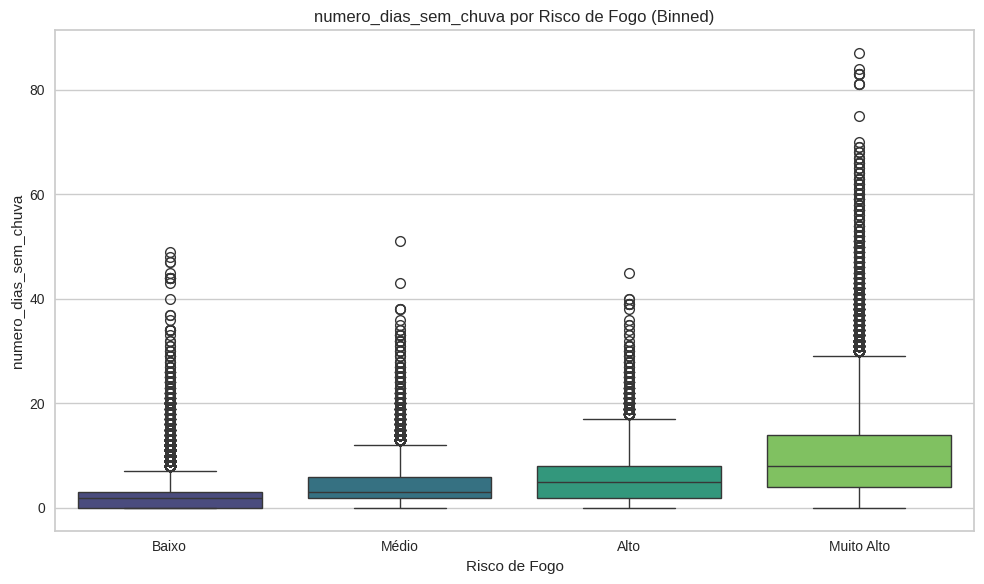

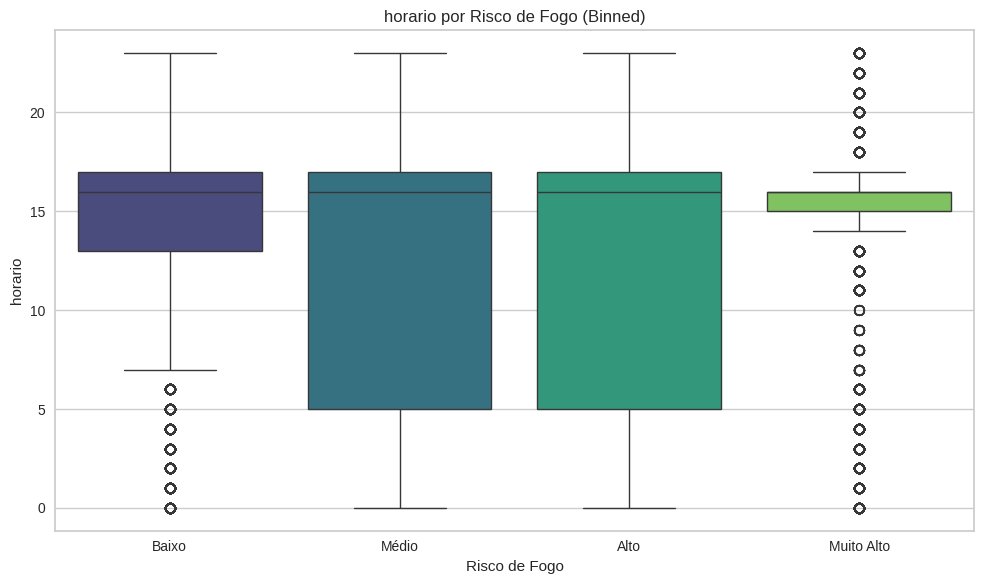

In [ ]:
for col in df_numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='risco_fogo_binned', y=col, data=df, palette='viridis')
    plt.title(f'{col} por Risco de Fogo (Binned)')
    plt.xlabel('Risco de Fogo')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Visualização da distribuição horária dos riscos de fogo

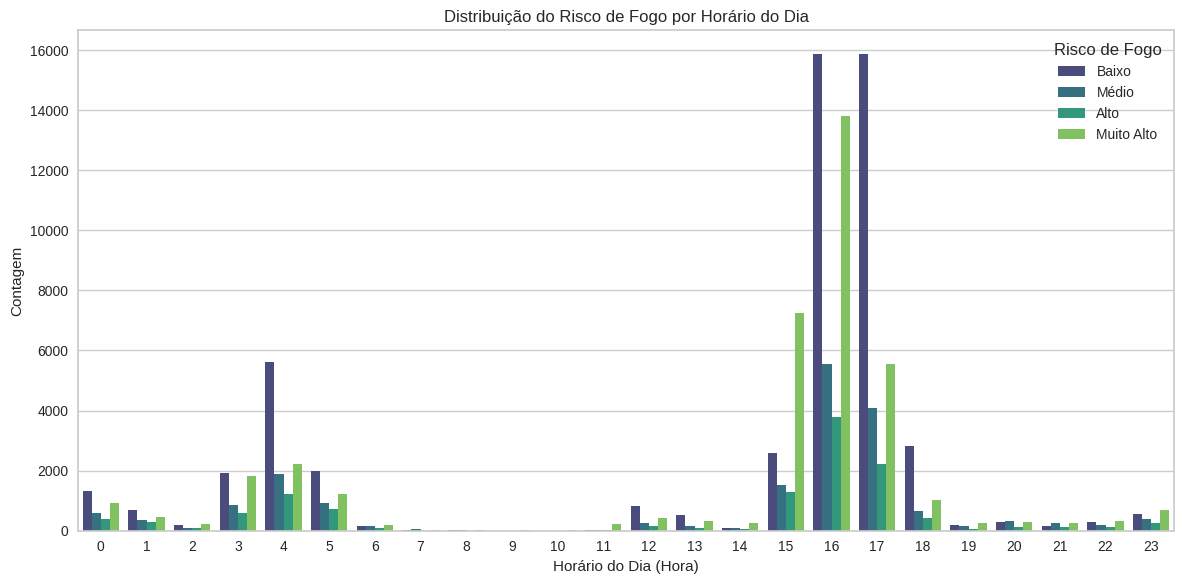

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='horario', hue='risco_fogo_binned', data=df, palette='viridis')
plt.title('Distribuição do Risco de Fogo por Horário do Dia')
plt.xlabel('Horário do Dia (Hora)')
plt.ylabel('Contagem')
plt.legend(title='Risco de Fogo')
plt.tight_layout()
plt.show()

## Modelagem (Machine Learning)

In [ ]:
# sample 5% of data to be used as unseen data
df_train_test = df.sample(frac=0.95, random_state=123)
df_valid = df.drop(df_train_test.index)
df_train_test.reset_index(inplace=True, drop=True)
df_valid.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(df_train_test.shape))
print('Unseen Data For Predictions: ' + str(df_valid.shape))

Data for Modeling: (114490, 7)
Unseen Data For Predictions: (6026, 7)


In [ ]:
s = setup(data = df_train_test,
          target = 'risco_fogo_binned',
          fix_imbalance = True,
          remove_outliers = True,
          categorical_features = ['municipio', 'estado', 'bioma', 'dia_de_semana'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,risco_fogo_binned
2,Target type,Multiclass
3,Target mapping,"Alto: 0, Baixo: 1, Muito Alto: 2, Médio: 3"
4,Original data shape,"(114490, 7)"
5,Transformed data shape,"(168019, 18)"
6,Transformed train set shape,"(133672, 18)"
7,Transformed test set shape,"(34347, 18)"
8,Numeric features,2
9,Categorical features,4


In [ ]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7148,0.8930,0.7148,0.7199,0.7171,0.5838,0.5840,17.4860
et,Extra Trees Classifier,0.7066,0.8769,0.7066,0.7129,0.7094,0.5722,0.5724,17.9100
dt,Decision Tree Classifier,0.6931,0.8160,0.6931,0.7085,0.6994,0.5559,0.5567,4.3270
xgboost,Extreme Gradient Boosting,0.6572,0.8668,0.6572,0.6678,0.6619,0.5021,0.5025,8.9880
lightgbm,Light Gradient Boosting Machine,0.6408,0.8596,0.6408,0.6588,0.6487,0.4811,0.4818,13.5260
knn,K Neighbors Classifier,0.6043,0.8150,0.6043,0.6428,0.6194,0.4381,0.4409,11.2820
gbc,Gradient Boosting Classifier,0.5877,0.0000,0.5877,0.6496,0.6115,0.4218,0.4266,44.0110
nb,Naive Bayes,0.5730,0.7843,0.5730,0.5922,0.5700,0.3790,0.3850,3.7200
svm,SVM - Linear Kernel,0.5682,0.0000,0.5682,0.5876,0.5560,0.3693,0.3818,7.8380
ridge,Ridge Classifier,0.5618,0.0000,0.5618,0.5912,0.5744,0.3717,0.3732,3.8380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Tunando a Random Forest

In [ ]:
mdl_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7118,0.8906,0.7118,0.7148,0.7132,0.5784,0.5785
1,0.7102,0.8944,0.7102,0.7163,0.7129,0.5778,0.5780
2,0.7092,0.8901,0.7092,0.7152,0.7120,0.5758,0.5760
3,0.7210,0.8948,0.7210,0.7283,0.7243,0.5935,0.5937
4,0.7131,0.8939,0.7131,0.7162,0.7146,0.5803,0.5804
5,0.7184,0.8970,0.7184,0.7230,0.7205,0.5886,0.5887
6,0.7206,0.8943,0.7206,0.7257,0.7230,0.5923,0.5924
7,0.7114,0.8901,0.7114,0.7185,0.7146,0.5797,0.5799
8,0.7109,0.8913,0.7109,0.7162,0.7133,0.5784,0.5785


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(mdl_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5723,0.8156,0.5723,0.6229,0.5914,0.3966,0.4005
1,0.5722,0.8190,0.5722,0.6260,0.5926,0.3976,0.4016
2,0.5681,0.8157,0.5681,0.6196,0.5881,0.3907,0.3942
3,0.5727,0.8140,0.5727,0.6134,0.5886,0.3938,0.3965
4,0.5670,0.8106,0.5670,0.6159,0.5850,0.3885,0.3927
5,0.5661,0.8185,0.5661,0.6216,0.5874,0.3890,0.3931
6,0.5670,0.8110,0.5670,0.6197,0.5866,0.3902,0.3944
7,0.5634,0.8076,0.5634,0.6100,0.5815,0.3819,0.3852
8,0.5589,0.8129,0.5589,0.6195,0.5819,0.3812,0.3858


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Salvando o modelo

In [ ]:
save_model(tuned_rf, '/content/pickle_tuned_rf_pycaret2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['numero_dias_sem_chuva',
                                              'horario'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',

In [ ]:
save_model(mdl_rf, '/content/pickle_rf_pycaret2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['numero_dias_sem_chuva',
                                              'horario'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',